In [2]:
import pandas as pd
com = pd.read_csv('../data/all_experimental_pIC50_vs_predicted.csv')

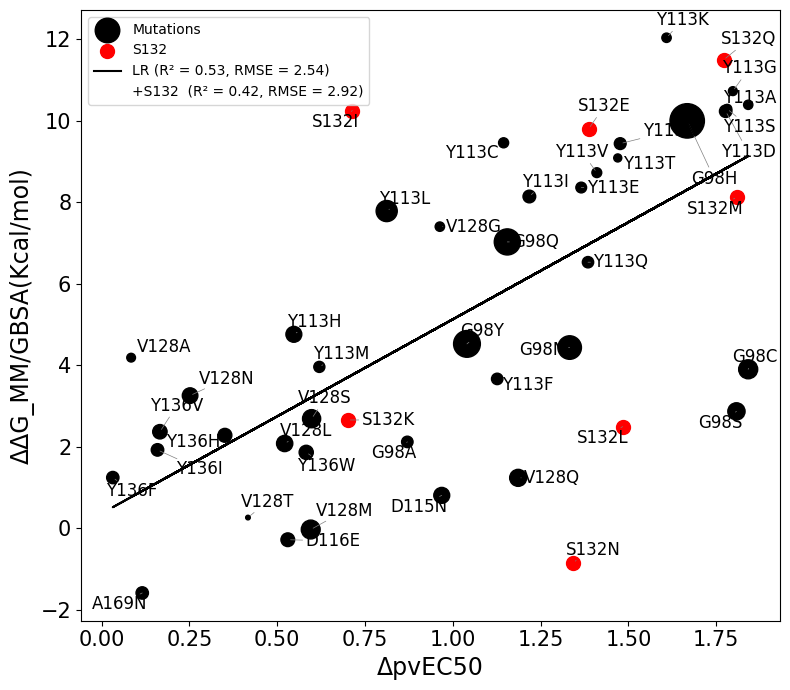

In [4]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Filter out residue numbers 132 and 98 for com2
com2 = com[~(com['Residue_Number'] == 132)]
#com2 = com2[~(com2['Residue_Number'] == 98)]

# Extract data for residue number 132
com132 = com[com['Residue_Number'] == 132]

# Scatter plot
plt.figure(figsize=(8, 7))

# Plot all other mutations (not residue 132)
plt.scatter(com2['ΔpIC50'], com2['Δ_affinity'], s=com2['Std']*60, color='black', label='Mutations')  # Adjust size factor (30) as needed

# Plot residue 132 with a fixed size and red color
plt.scatter(com132['ΔpIC50'], com132['Δ_affinity'], s=100, color='red', label='S132')  # Fixed size (100)

# Linear regression for com2
X_com2 = com2[['ΔpIC50']].values  # Feature (pIC50)
y_com2 = com2['Δ_affinity'].values  # Target (Δ Affinity)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_com2, y_com2)

# Predict values for regression line
y_pred = model.predict(X_com2)

# Calculate R² and RMSE for com2
r2_com2 = model.score(X_com2, y_com2)
rmse_com2 = np.sqrt(mean_squared_error(y_com2, y_pred))

# Plot the regression line for com2
plt.plot(com2['ΔpIC50'], y_pred, color='black', label=f'LR (R² = {r2_com2:.2f}, RMSE = {rmse_com2:.2f})')

# Combine com2 and com132 for a combined linear regression
com_combined = pd.concat([com2, com132])

X_combined = com_combined[['ΔpIC50']].values  # Feature (pIC50)
y_combined = com_combined['Δ_affinity'].values  # Target (Δ Affinity)

# Fit the model with both com2 and com132
model_combined = LinearRegression()
model_combined.fit(X_combined, y_combined)

# Predict values for regression line with combined data
y_pred_combined = model_combined.predict(X_combined)

# Calculate R² and RMSE for the combined data
r2_combined = model_combined.score(X_combined, y_combined)
rmse_combined = np.sqrt(mean_squared_error(y_combined, y_pred_combined))

# Plot the regression line for combined data
plt.plot(com_combined['ΔpIC50'], y_pred_combined, color='none', label=f'+S132  (R² = {r2_combined:.2f}, RMSE = {rmse_combined:.2f})')

# Add labels to each point in com2
texts = []
for i in range(len(com2)):
    text = plt.text(com2['ΔpIC50'].iloc[i], com2['Δ_affinity'].iloc[i], str(com2['Full_residue'].iloc[i]),
                    fontsize=12, ha='center', va='center')
    texts.append(text)

# Add labels to each point in com132
for i in range(len(com132)):
    text = plt.text(com132['ΔpIC50'].iloc[i], com132['Δ_affinity'].iloc[i], str(com132['Full_residue'].iloc[i]),
                    fontsize=12, ha='center', va='center', color='black')
    texts.append(text)

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Set plot labels and title
plt.xlabel('ΔpvEC50', fontsize=17)
plt.ylabel('ΔΔG_MM/GBSA(Kcal/mol)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('', fontsize=16)

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()

# Optionally, print the R² and RMSE for both regressions
#print(f"R² (com2 only): {r2_com2:.2f}")
#print(f"RMSE (com2 only): {rmse_com2:.2f}")
#print(f"R² (combined): {r2_combined:.2f}")
#print(f"RMSE (combined): {rmse_combined:.2f}")

In [6]:
final = pd.read_csv('../data/all_combined_final.csv')
final

,Unnamed: 0,Δ_affinity,delta Affinity Coulomb,delta Affinity Hbond,delta Affinity Lipo,delta Affinity Solv GB,delta Affinity vdW,Std,Residue_Number,Residue,Full_residue,Full_residuem,Mutation,rmsd
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,1,1.66425,0.04650,-0.00600,0.6320,0.90325,0.08000,1.182112,1.0,T,T1,T1A,A,0.456533
2,2,-1.46600,-0.52975,-0.20650,-1.9200,2.70775,-1.49075,2.265284,1.0,T,T1,T1R,R,0.679960
3,3,-0.14275,-0.03075,-0.00150,0.6340,0.08875,-0.50225,2.276908,1.0,T,T1,T1N,N,0.435412
4,4,1.50550,-0.94825,-0.00225,1.0405,2.47850,-1.08000,2.801652,1.0,T,T1,T1D,D,0.354717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,375,-3.14850,-0.34300,0.00050,-1.7400,-0.18475,-0.85125,4.382166,169.0,A,A169,A169F,F,0.263132
375,376,-1.99200,0.48525,0.00775,-1.5595,-0.43200,-0.48400,1.328490,169.0,A,A169,A169P,P,0.305758
376,377,-1.01325,-1.32200,0.01825,0.3710,0.05325,-0.14075,1.313028,169.0,A,A169,A169S,S,0.292511
377,378,-2.98425,-0.54450,-0.00700,-1.2350,-0.21725,-0.96875,0.837950,169.0,A,A169,A169T,T,0.272912


/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_9241/355498122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Full_residue', y='delta Affinity Hbond', data=final, palette="tab20")


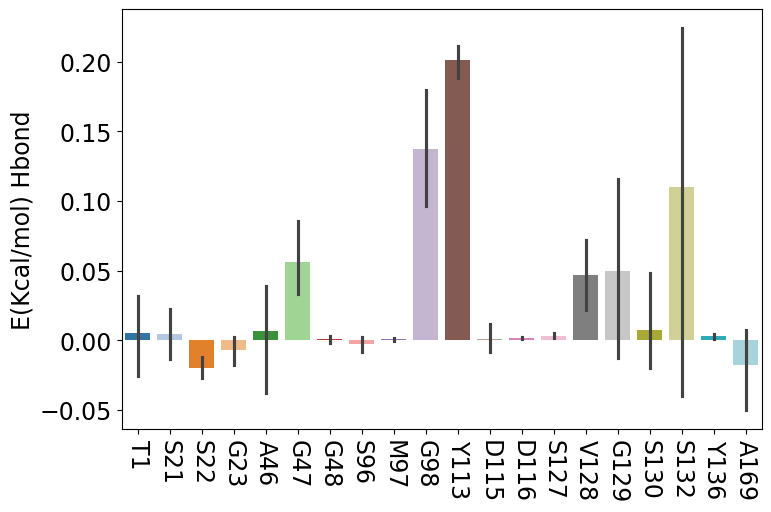

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Full_residue', y='delta Affinity Hbond', data=final, palette="tab20")
plt.title('')
plt.xlabel('', fontsize=17)
plt.ylabel('E(Kcal/mol) Hbond', fontsize=17)
plt.xticks(rotation=270, ha='center', fontsize=17)
plt.yticks(fontsize=17)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  # Adjust these values as needed

# Show the plot
plt.show()

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_9241/2577956410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Full_residue', y='delta Affinity Lipo', data=final, palette="tab20")


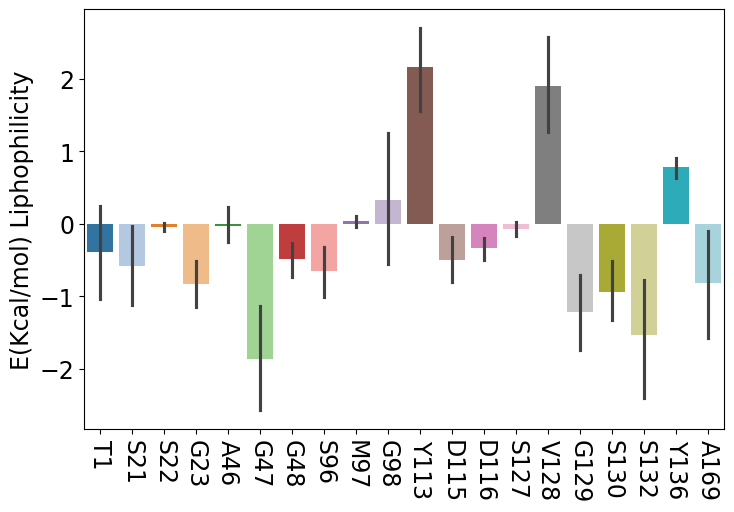

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Full_residue', y='delta Affinity Lipo', data=final, palette="tab20")
plt.title('')
plt.xlabel('', fontsize=17)
plt.ylabel('E(Kcal/mol) Liphophilicity', fontsize=17)
plt.xticks(rotation=270, ha='center', fontsize=17)
plt.yticks(fontsize=17)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  # Adjust these values as needed

# Show the plot
plt.show()

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_9241/612234246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Full_residue', y='Δ_affinity', data=final, palette="tab20")


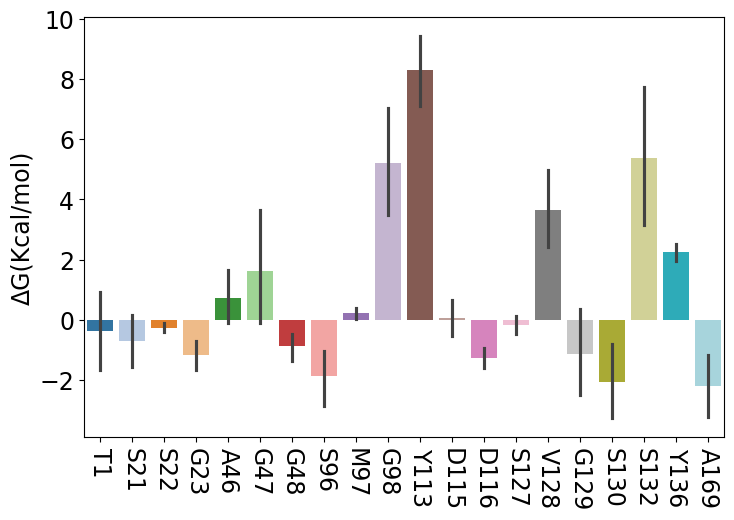

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Full_residue', y='Δ_affinity', data=final, palette="tab20")
plt.title('')
plt.xlabel('', fontsize=17)
plt.ylabel('ΔG(Kcal/mol)', fontsize=17)
plt.xticks(rotation=270, ha='center', fontsize=17)
plt.yticks(fontsize=17)
#plt.ylim(-4, 12) 
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  # Adjust these values as needed

# Show the plot
plt.show()

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_9241/491639513.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Full_residue', y='rmsd', data=final, palette="tab20")


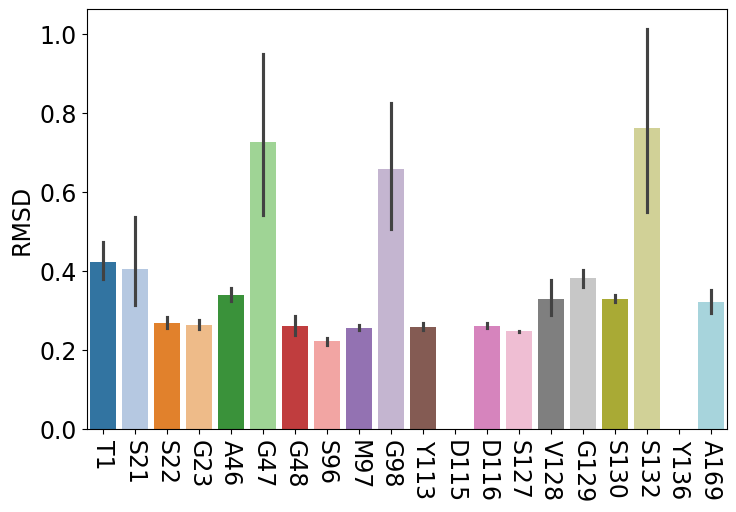

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Full_residue', y='rmsd', data=final, palette="tab20")
plt.title('')
plt.xlabel('', fontsize=17)
plt.ylabel('RMSD', fontsize=17)
plt.xticks(rotation=270, ha='center', fontsize=17)
plt.yticks(fontsize=17)
#plt.ylim(-4, 12) 
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  # Adjust these values as needed

# Show the plot
plt.show()

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_9241/4077682785.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Full_residue', y='delta Affinity Coulomb', data=final, palette="tab20")


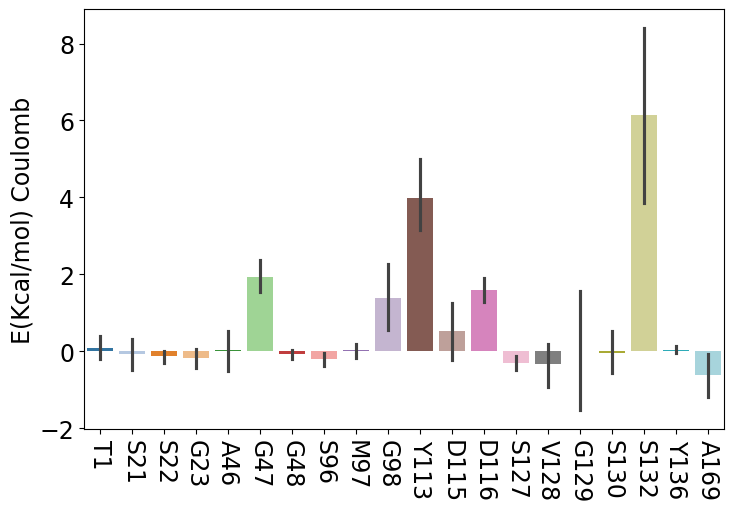

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Full_residue', y='delta Affinity Coulomb', data=final, palette="tab20")
plt.title('')
plt.xlabel('', fontsize=17)
plt.ylabel('E(Kcal/mol) Coulomb', fontsize=17)
plt.xticks(rotation=270, ha='center', fontsize=17)
plt.yticks(fontsize=17)
#plt.ylim(-4, 12) 
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  # Adjust these values as needed

# Show the plot
plt.show()

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_9241/1426118837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Full_residue', y='delta Affinity vdW', data=final, palette="tab20")


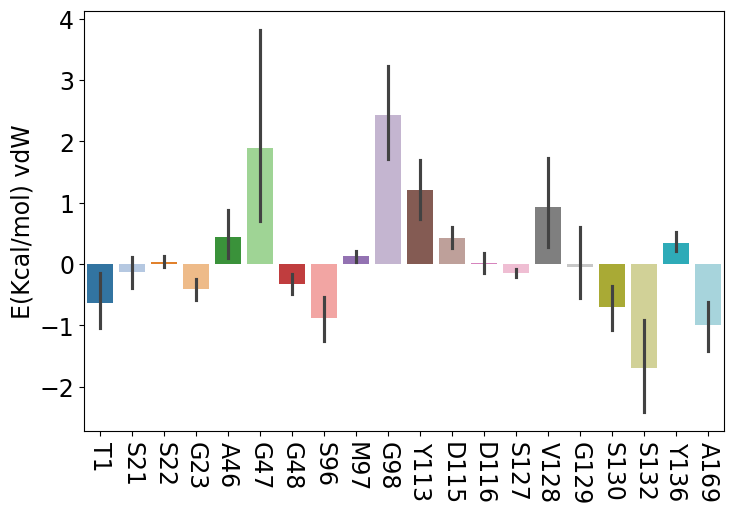

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Full_residue', y='delta Affinity vdW', data=final, palette="tab20")
plt.title('')
plt.xlabel('', fontsize=17)
plt.ylabel('E(Kcal/mol) vdW', fontsize=17)
plt.xticks(rotation=270, ha='center', fontsize=17)
plt.yticks(fontsize=17)
#plt.ylim(-4, 12) 
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  # Adjust these values as needed

# Show the plot
plt.show()